In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset from Excel file
data = pd.read_csv("C:/Alvito/UNPAD/SEMESTER 6/Dataset_error (1).csv")
data.head()
data.describe()

,altitude,windspeed,velocity,Error,Output
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,3.800693,3.732959,3.010815,3.740160,2.500000
std,2.239861,2.213986,1.741089,3.308670,1.708053
min,0.003637,0.001681,0.002799,0.002020,0.000000
25%,1.869783,1.887650,1.501151,1.504351,1.000000
50%,3.750213,3.643537,3.019029,2.970169,2.500000
75%,5.605808,5.506191,4.543659,4.493141,4.000000
max,7.999432,7.999423,5.999745,14.989964,5.000000


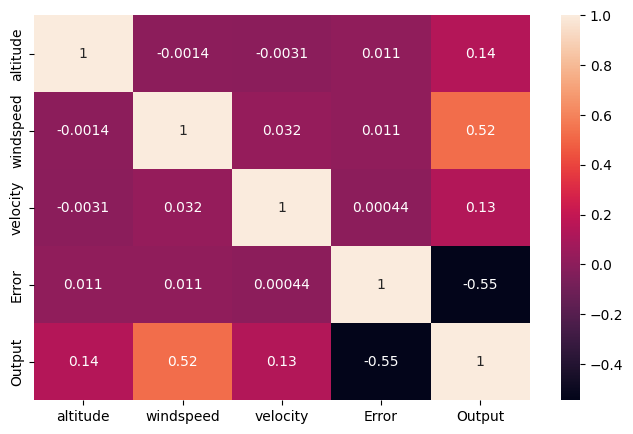

In [25]:
#Creating heatmap
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True)
plt.show()

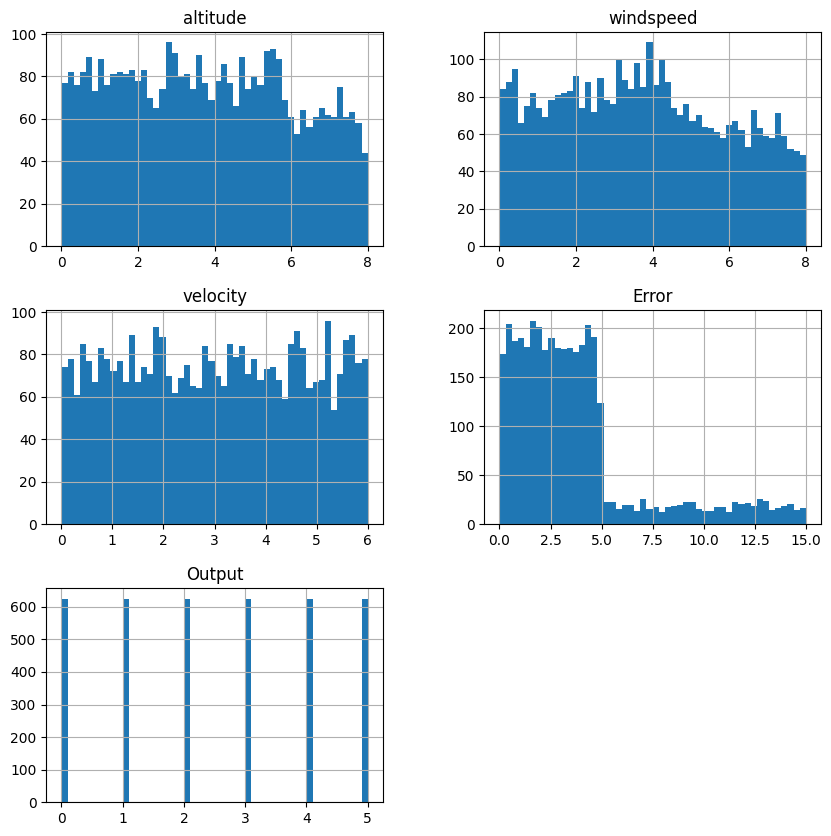

In [3]:
data.hist(bins=50, figsize=(10,10))
plt.show()

In [4]:
# Extract features and target variable
X = data.drop('Output', axis=1) # replace 'target_variable_column_name' with the name of your target variable column
y = data['Output']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define decision tree model
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Define bagged trees ensemble model with 100 trees
from sklearn.ensemble import BaggingClassifier
bagged_model = BaggingClassifier(estimator=tree_model, n_estimators=100)

# Train bagged trees ensemble model on training set
bagged_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

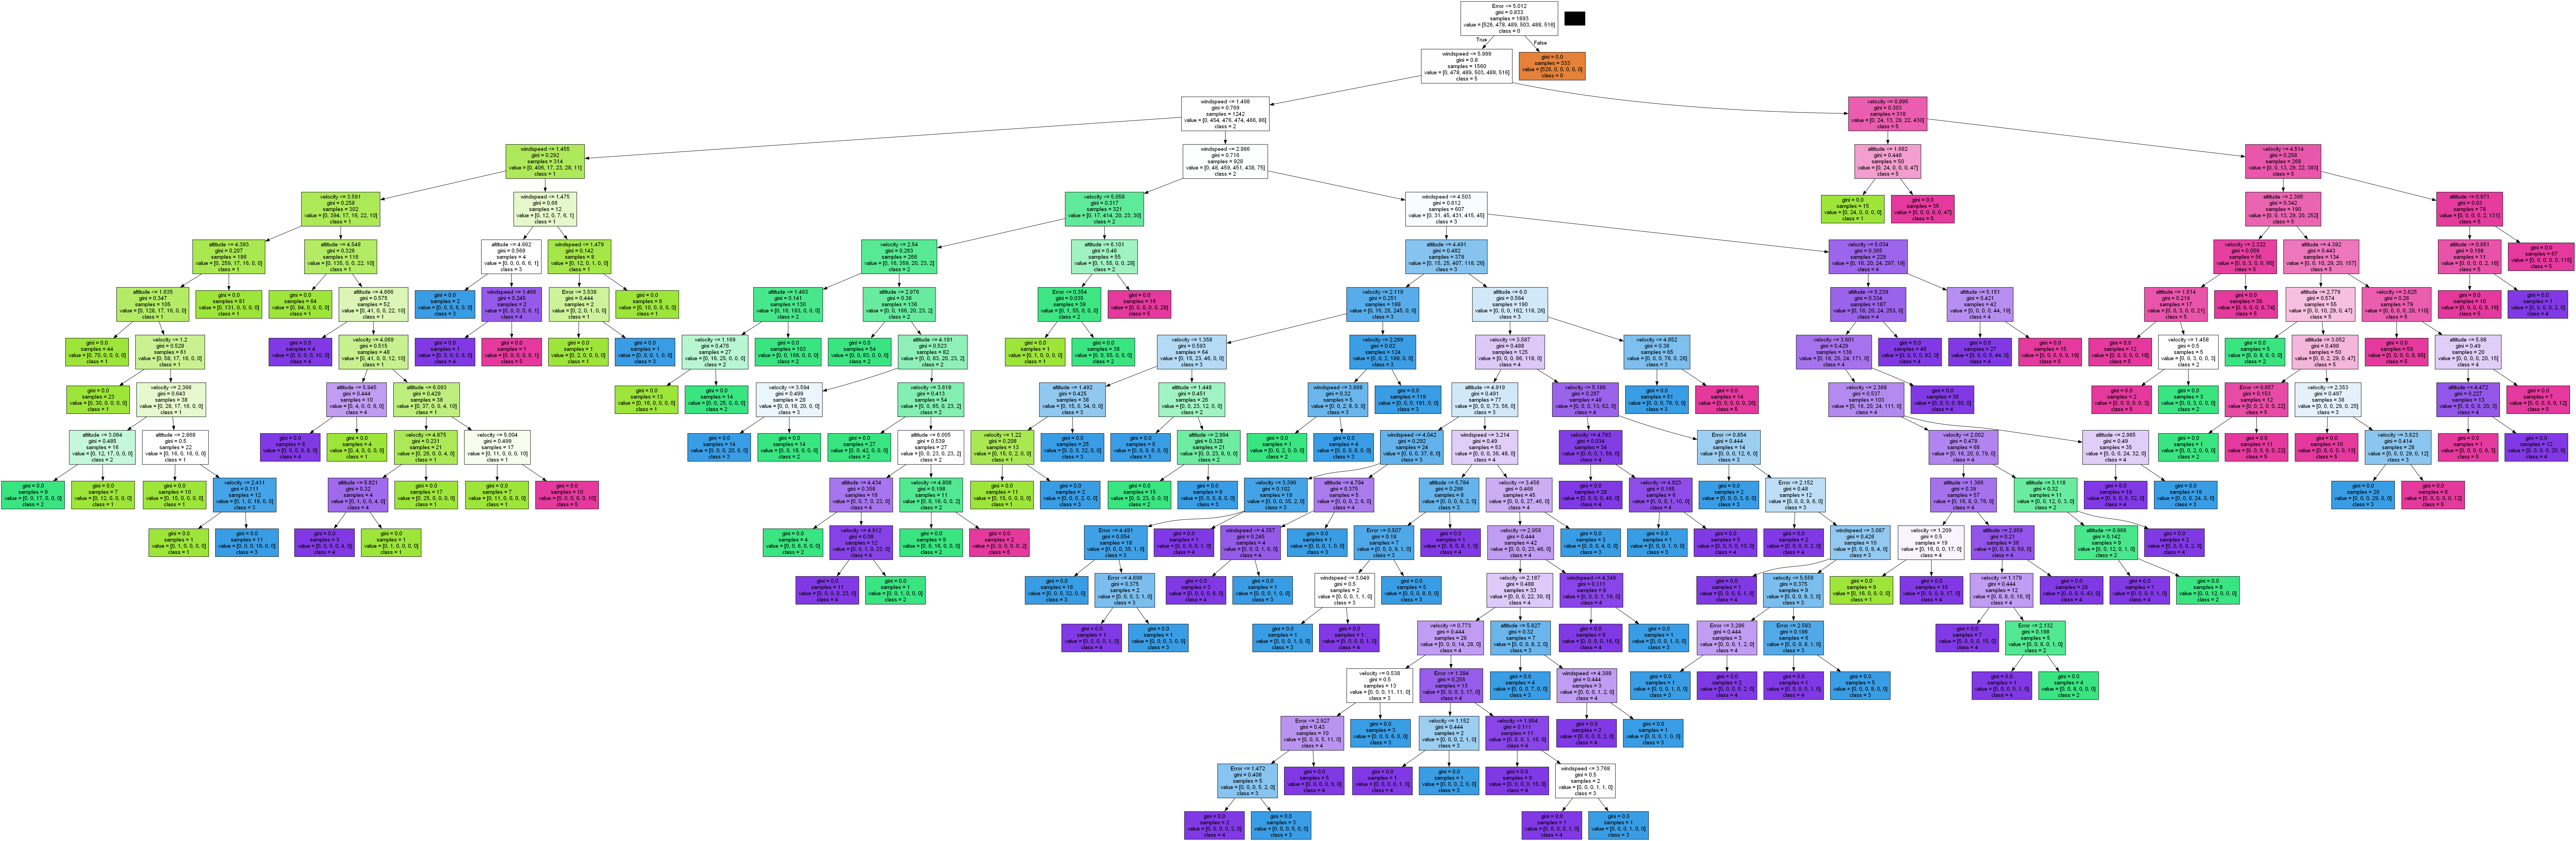

In [5]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Select one tree from the ensemble
tree_to_plot = bagged_model.estimators_[0]

# Convert class names to list of strings
class_names = [str(class_name) for class_name in bagged_model.classes_]

# Plot the selected tree
dot_data = export_graphviz(tree_to_plot, out_file=None, feature_names=X.columns, class_names=class_names, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png")  # Save the tree visualization as an image file

# Display the saved image using IPython
Image("tree.png")


In [6]:
# Evaluate model on test set
from sklearn.metrics import precision_score

# Generate predictions on the test set
y_pred = bagged_model.predict(X_test)

# Calculate precision for each class
precisions = precision_score(y_test, y_pred, average=None)
accuracy = bagged_model.score(X_test, y_test)
print(f"Akurasi Model Ensemble Bagged Trees pada Sistem Smart Sprayer adalah : {accuracy:f}")
print("Precisions for each class:")
for class_label, precision in enumerate(precisions):
    print(f"Class {class_label}: {precision:.2f}")

Akurasi Model Ensemble Bagged Trees pada Sistem Smart Sprayer adalah : 0.949333
Precisions for each class:
Class 0: 1.00
Class 1: 0.94
Class 2: 0.99
Class 3: 0.89
Class 4: 0.91
Class 5: 0.97


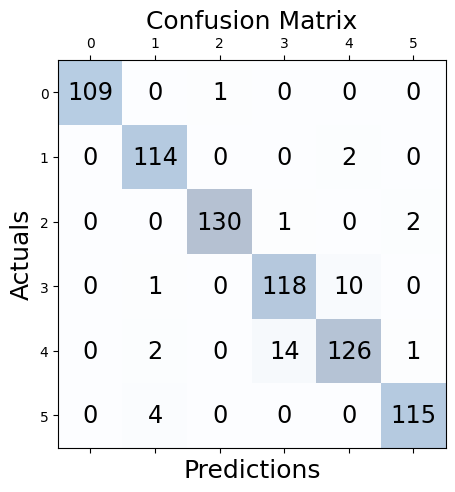

In [7]:
from sklearn.metrics import classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,20))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [8]:
# Calculate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics from classification report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
support = report['weighted avg']['support']

# Calculate True Positive Rate (TPR)
tpr = recall

# Calculate False Positive Rate (FPR)
fpr = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])
fpr = 1 -tpr

# Calculate Positive Predictive Value (PPV)
ppv = precision

# Calculate False Discovery Rate (FDR)
fdr = 1 - ppv

# Print the metrics
report = classification_report(y_pred, y_test)
print(report)
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)
print("Positive Predictive Value (PPV):", ppv)
print("False Discovery Rate (FDR):", fdr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       0.98      0.94      0.96       121
           2       0.98      0.99      0.98       131
           3       0.91      0.89      0.90       133
           4       0.88      0.91      0.90       138
           5       0.97      0.97      0.97       118

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750

True Positive Rate (TPR): 0.9493333333333334
False Positive Rate (FPR): 0.05066666666666664
Positive Predictive Value (PPV): 0.9496865473397523
False Discovery Rate (FDR): 0.05031345266024767


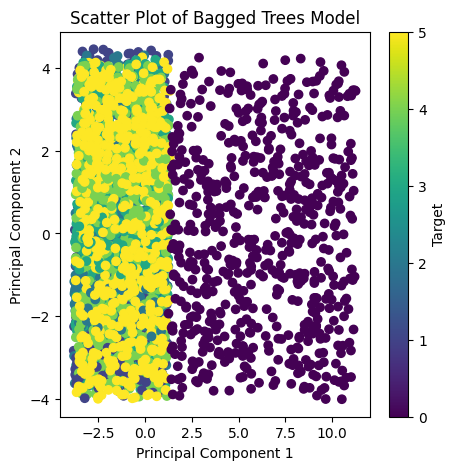

In [9]:
# Creating Scattered Plot
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(5, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Bagged Trees Model')
plt.colorbar(label='Target')
plt.show()

<Figure size 640x480 with 0 Axes>

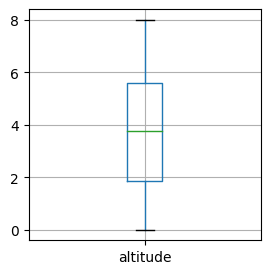

<Figure size 640x480 with 0 Axes>

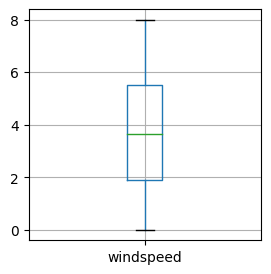

<Figure size 640x480 with 0 Axes>

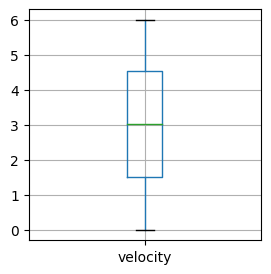

<Figure size 640x480 with 0 Axes>

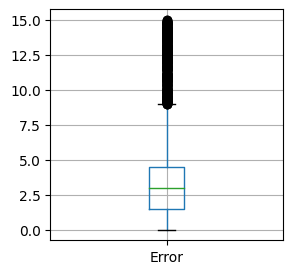

<Figure size 640x480 with 0 Axes>

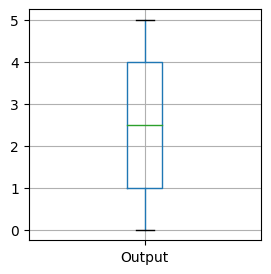

In [10]:
for column in data:
    plt.figure()
    plt.figure(figsize=(3, 3))
    data.boxplot([column])